**Asset: Items you own, or *money in* your pocket.**
**Liabilities: What you have to pay back to other parties(debt) or *money out*.** 

According to the **REPORT OF THE**
**HOUSEHOLD FINANCE COMMITTEE 2017** , I categorized some terms into assets and liabilities:

ASSETS
1. **Real Estate**: lands, buildings and other constructions owned by the household, for residential, commercial or vacational purposes.
2. **Durable Goods**: vehicles & other transport equipment,valuables, work of art & carpets, livestock & poultry, agricultural machinery, & other farm and non-farm equipments.
3. **Gold**: jewellery, bullion,ornaments and coins.
4. **Financial Assets**: includes bank deposits, publicly traded shares, government securities, mutual funds, managed accounts, loan received by the household.
5. **Retirement Accounts**: private pension accounts, provident funds, annuity certificates, life insurance accounts. 

LIABILITIES
1. **Mortgage Debts:** loans using land or real-estate as collateral.
2. **Other Security Debts:** loans secured by a 3rd-party, loans using crops, shares of companies, government securities, insurance policies as collateral.
3. **Gold Loans:** use bullion and ornaments as collateral.
4. **Unsecured Debts:** loans from money-lenders, loans from family and friends, credit cards, overdraft facilities.



In [0]:
#using the 'NSSO_2002_full.dta' dataset. Converting it to csv format.
import pandas as pd
import numpy as np
data = pd.io.stata.read_stata('NSSO_2002_full.dta')
data.to_csv('my_stata_file.csv')

In [0]:
#viewing the dataset
df=pd.read_csv('my_stata_file.csv')
df.head()

Unnamed: 0        HHID  Sector  State_Region  ...  NSS  NSC        MLT   Weight
0           0  1100011101       2           331  ...   18   36 2850.28000 14.25140
1           1  1100011102       2           331  ...   18   36 2850.28000 14.25140
2           2  1100012101       2           331  ...   18   36 2114.72000 10.57360
3           3  1100012102       2           331  ...   18   36 2114.72000 10.57360
4           4  1100013101       2           331  ...   18   36 2942.22000 14.71110

[5 rows x 148 columns]

In [0]:
#checking number of rows in the dataset
df.shape[0]

143285

In [0]:
#printing all the column names
cols = df.columns.tolist()
print(cols)

['Unnamed: 0', 'HHID', 'Sector', 'State_Region', 'State', 'District', 'hh_type', 'hh_size', 'age', 'edu', 'ind_child', 'num_child', 'num_daughter', 'resi_l', 'agri_l', 'other_l', 'total_l', 'resi_b', 'agri_b', 'other_b', 'total_b', 'agri_equip', 'livestock', 'non_agri', 'transport1', 'transport2', 'transport3', 'transport4', 'transport5', 'transport6', 'trans_tot', 'bullion', 'fin6', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'amt_rec', 'kind_loans', 'liab_govt', 'liab_bank', 'liab_nonbank', 'liab_ins', 'liab_profml', 'liab_agriml', 'liab_network', 'term11', 'term12', 'term13', 'term21', 'term22', 'term23', 'term31', 'term32', 'term33', 'term41', 'term42', 'term43', 'term51', 'term52', 'term53', 'term61', 'term62', 'term63', 'term71', 'term72', 'term73', 'security11', 'security12', 'security13', 'security21', 'security22', 'security23', 'security31', 'security32', 'security33', 'security41', 'security42', 'security43', 'security51', 'security52', 'security53', 'security61', 'security62', 

From the dataset we categorized the column into the following:

## ASSET

**Real Estate**= resi_l, agri_l, other_l, resi_b, agri_b, other_b

**Durable Goods**= livestock, non_agri, agri_equip, trans_tot

**Gold**= bullion

**Financial Assets**= kind_loans

Note: One thing to be noted here is that many of the **definitions were unclear** in the dataset and even I could not find their understandable meaning in the **ICSSR Data Service: Social Science Data Repository **.

So due to **lack of clarity** I **did not take them into account** while performing analysis. 


In [0]:
#Real Estate Asset
REA_1=df[['resi_l','agri_l','other_l','resi_b','agri_b','other_b']]
#Printing float numbers upto 5 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Checking percentage of null values
((REA_1.isnull().sum())/(len(REA_1)))*100

resi_l    16.87616
agri_l    60.25892
other_l   95.34355
resi_b    16.72541
agri_b    77.97676
other_b   92.75639
dtype: float64

In [0]:
#Due to large number of null values, other_l and other_b columns are not much informative so dropping them.
REA_1.drop(columns=['other_l','other_b'],inplace=True)

In [0]:
#Checking skewness of features. The features are so right-skewed that even in log-scale their skewness is distinctly visible
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols=len(REA_1.columns), figsize=(28,15))
for ax, col in zip(axes, REA_1.columns):
  sns.distplot(REA_1[col].dropna(), ax=ax,hist_kws={'log':True})
  plt.tight_layout() 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


In [0]:
#To get a better intuition of their skewness we get the skewness co-efficient and show their normal plot.
for col in (REA_1.columns):
    try:
       skewed_grLiv = skew(REA_1[col].dropna())
       print('The skewness of '+str(col)+' :')
       print(skewed_grLiv)
       print('\n')
    except:
       pass

The skewness of resi_l :
44.40234542494703


The skewness of agri_l :
31.151958623482628


The skewness of resi_b :
31.063684864652384


The skewness of agri_b :
15.699820044835786




A **skewness>0** proves that features are right skewed. Greatet the value, larger the skewness. If skewness is 0 then normal plot should be perfectly straight.

The high skewness can be further confirmed by the high skewness coefficient of each feature. Note that usually in data analysis, **outliers are removed but here we will keep it** as it will give the estimation of wealth for the extreme rich and poorer section of the society, which is necessary.

In [0]:
#Replacing missing values by median as there is skewness hence a number of outliers and median is robust to outliers.
REA_1.fillna(REA_1.median(), inplace=True)

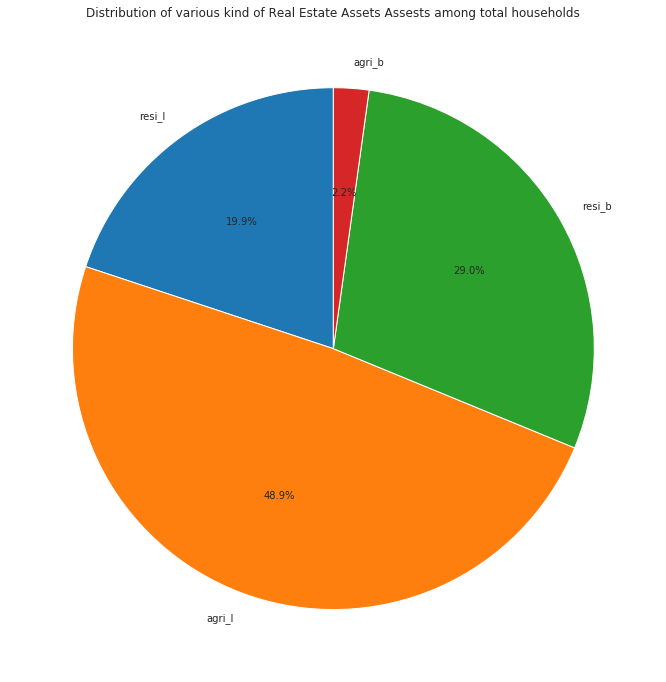

In [0]:
#Visualizing the distribution of diffeent Real Estate Assets across Indian Households
plt.figure(figsize=(12,12))
plt.pie(REA_1[['resi_l','agri_l','resi_b','agri_b']].sum(), labels=['resi_l','agri_l','resi_b','agri_b'],  startangle=90, autopct='%.1f%%')
plt.title('Distribution of various kind of Real Estate Assets Assests among total households')
plt.show()

In [0]:
#Creating Durable goods dataframe
DG_1=df[['livestock','non_agri','agri_equip','trans_tot']]
#Cheking percentage of missing values
((DG_1.isnull().sum())/(len(DG_1)))*100

livestock    59.49541
non_agri     79.00967
agri_equip   44.22096
trans_tot    48.25697
dtype: float64

In [0]:
#Replacing missing values with median
DG_1.fillna(DG_1.median(), inplace=True)

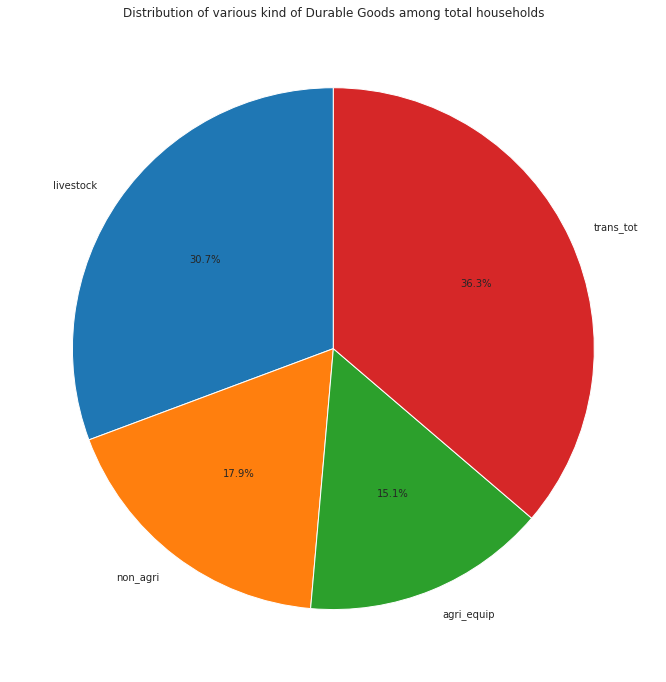

In [0]:
# Showing the distribution of various kind of Durable Goods among Indian households
plt.figure(figsize=(12,12))
plt.pie(DG_1[['livestock','non_agri','agri_equip','trans_tot']].sum(), labels=['livestock','non_agri','agri_equip','trans_tot'],  startangle=90, autopct='%.1f%%')
plt.title('Distribution of various kind of Durable Goods among total households')
plt.show()

In [0]:
#Financial Asset Series object creation
FA_1=df['kind_loans']
#Gold Series object creation
G_1=df['bullion']

In [0]:
#Converting Series object to Dataframe
FA_1=pd.DataFrame(FA_1)
G_1=pd.DataFrame(G_1)

In [0]:
FA_1.fillna(FA_1.median(), inplace=True)
G_1.fillna(G_1.median(), inplace=True)

([<matplotlib.axis.YTick at 0x7f16e7087a58>,
 <a list of 4 Text yticklabel objects>)

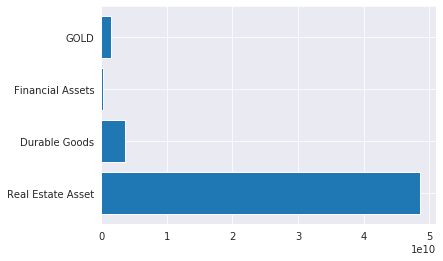

In [0]:
#Comparison of presence of different kinds of assets in Indian Households
height=[np.sum(REA_1.sum()),np.sum(DG_1.sum()),np.sum(FA_1.sum()),np.sum(G_1.sum())]
bars=['Real Estate Asset','Durable Goods','Financial Assets','GOLD']
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
#plt.title('Comparison of presence of different kinds of assets in Indian Households')

The above barplot shows that among all, Indian households have *Real Estate* *Asset* as their main assets which is much greater in amount than other kind of assets.

In [0]:
#There are a number of ages of the household owner given in the original Dataset. Trying to convert them into the below mentioned categories. Categories are decided from REPORT OF THE HOUSEHOLD FINANCE COMMITTEE 2017
bins=[0,35,45,55,65,100]
bin_names = ['<35', '35-44', '45-54', '55-64','>65']
df['new_age'] = pd.cut(df['age'], bins,labels=bin_names,right=False)
REA_1['Age']=df['new_age']
DG_1['Age']=df['new_age']
FA_1['Age']=df['new_age']
G_1['Age']=df['new_age']

In [0]:
bins=[0,0.20,0.40,0.60,0.80,1]

bin_names = ['1st', '2nd', '3rd', '4th','5th']
REA_1['n_resi_l'] = pd.cut(REA_1['resi_l'], bins,labels=bin_names,right=False)

REA_1['n_resi_b'] = pd.cut(REA_1['resi_b'], bins,labels=bin_names,right=False)

REA_1['n_agri_l'] = pd.cut(REA_1['agri_l'], bins,labels=bin_names,right=False)

REA_1['n_agri_b'] = pd.cut(REA_1['agri_b'], bins,labels=bin_names,right=False)

From the dataset we categorized the column into the following:

## LIABILITIES

**Unsecured Debts:** liab_profml, liab_agriml, liab_network, liab2_unsecured, liab4_no_interest

**Secured Debts:**   liab_govt, liab_bank, liab_nonbank, liab_ins, liab4_interest, liab3_short

In [0]:
UD_1=df[['liab_profml', 'liab_agriml', 'liab_network', 'liab2_unsecured', 'liab4_no_interest']]
SD_1=df[['liab_govt', 'liab_bank', 'liab_nonbank', 'liab_ins', 'liab4_interest', 'liab3_short']]

In [0]:
((UD_1.isnull().sum())/(len(UD_1)))*100

liab_profml         0.00000
liab_agriml         0.00000
liab_network        0.00000
liab2_unsecured     0.00000
liab4_no_interest   0.00000
dtype: float64

In [0]:
((SD_1.isnull().sum())/(len(SD_1)))*100

liab_govt        0.00000
liab_bank        0.00000
liab_nonbank     0.00000
liab_ins         0.00000
liab4_interest   0.00000
liab3_short      0.00000
dtype: float64

In [0]:
UD_1.fillna(UD_1.median(), inplace=True)
SD_1.fillna(SD_1.median(), inplace=True)

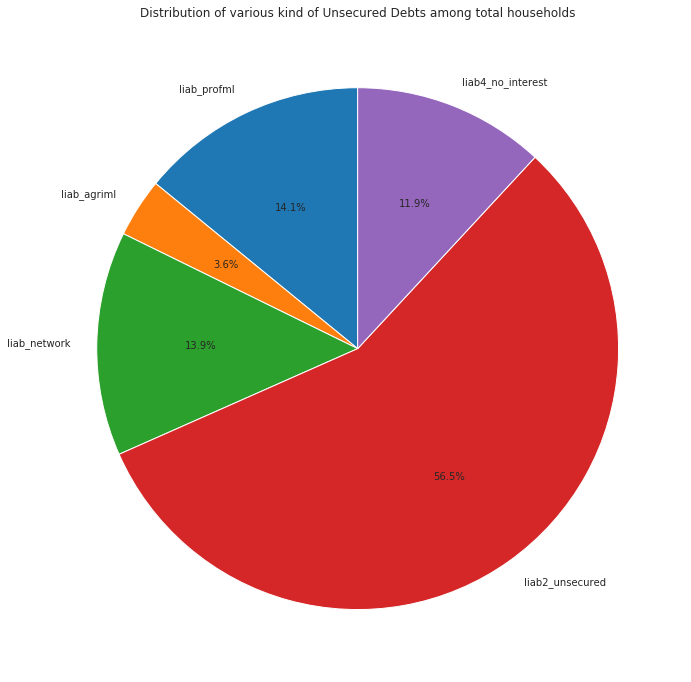

In [0]:
plt.figure(figsize=(12,12))
plt.pie(UD_1[['liab_profml', 'liab_agriml', 'liab_network', 'liab2_unsecured', 'liab4_no_interest']].sum(), labels=['liab_profml', 'liab_agriml', 'liab_network', 'liab2_unsecured', 'liab4_no_interest'],  startangle=90, autopct='%.1f%%')
plt.title('Distribution of various kind of Unsecured Debts among total households')
plt.show()

In [0]:
plt.figure(figsize=(12,12))
plt.pie(SD_1[[ 'liab_govt', 'liab_bank', 'liab_nonbank', 'liab_ins', 'liab4_interest', 'liab3_short']].sum(), labels=['liab_govt', 'liab_bank', 'liab_nonbank', 'liab_ins', 'liab4_interest', 'liab3_short'],  startangle=90, autopct='%.1f%%')
plt.title('Distribution of various kind of Secured Debts among total households')
plt.show()

In [0]:
#Comparison of presence of different kinds of liabilities in Indian Households
height=[np.sum(UD_1.sum()),np.sum(SD_1.sum())]
bars=['Unsecured Debts','Secured Debts']
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Comparison of presence of different kinds of liabilities in Indian Households')

Text(0.5, 1.0, 'Comparison of presence of different kinds of liabilities in Indian Households')

The above barplot shows the main source of liabilities for an Indian Household is *Secured Debts*. They also have a considerable amount of *Unsecured Debt* as liabilities.

In [0]:
#Creating the Dataframe with all the features I am working with for asset and liabilities
df3=df[['livestock','non_agri','agri_equip','trans_tot','resi_l','agri_l','resi_b','agri_b','bullion','kind_loans','liab_govt','liab_bank','liab_nonbank','liab_ins','liab4_interest','liab3_short','liab_profml','liab_agriml','liab_network','liab2_unsecured','liab4_no_interest','District','State']]
df3.fillna(df3.median(), inplace=True)
#Finding net valuation of asset
df3['net_asset']=(df3['livestock']+df3['non_agri']+df3['agri_equip']+df3['trans_tot']+df3['resi_l']+df3['resi_b']+df3['agri_l']+df3['agri_b']+df3['kind_loans']+df3['bullion'])
#Finding the net valuation of liabilities
df3['net_liabilities']=df3['liab_profml']+df3['liab_agriml']+df3['liab_network']+df3['liab2_unsecured']+df3['liab4_no_interest']+df3['liab_govt']+df3['liab_bank']+df3['liab_nonbank']+df3['liab_ins']+df3['liab4_interest']+df3['liab3_short']
#Adding age, edu and hh_size columns to df3 Dataframe
df3=df3.assign(**{'age': df['age'], 'edu': df['edu'], 'hh_size': df['hh_size']})
#Net Wealth of an household = net asset- net iiabilities
df3['wealth']=df3['net_asset']-df3['net_liabilities']

In [0]:
df3.shape[0]

143285

Text(0.5, 1.0, 'The distribution of wealth distribution among all Indian Household')

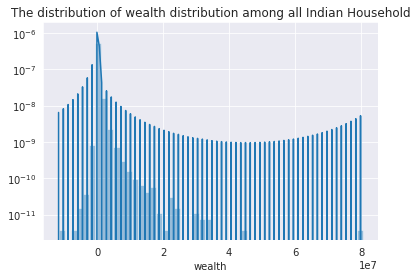

In [0]:
#Checking the distribution of wealth distribution among all Indian Household.
from scipy import stats
from scipy.stats import norm, skew
ds=sns.distplot(df3['wealth'])
ds.set( yscale="log")
plt.title('The distribution of wealth distribution among all Indian Household')

The net wealth seems skewed right. So there is inequality in wealth distribution in Indian society.

23.716690968228846


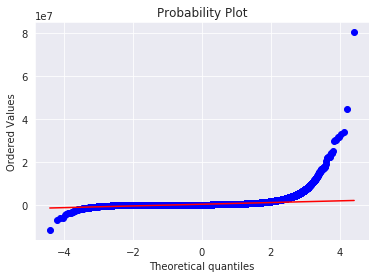

In [0]:
res = stats.probplot(df3['wealth'], plot=plt)
skewed_grLiv = skew(df3['wealth'])
print(skewed_grLiv)

A ***skewness>0*** proves that features are right skewed. Greatet the value, larger the skewness. If skewness is 0 then normal plot should be perfectly straight. 

So the **skewness of total wealth distribution** is further confirmed by **high** **skewness value and normality plot.**

In [0]:
#Diving ages into age groups as specified earlier for df3 dataframe
bins=[0,35,45,55,65,100]
bin_names = ['<35', '35-44', '45-54', '55-64','>65']
df3['new_age'] = pd.cut(df3['age'], bins,labels=bin_names,right=False)

Text(0.5, 1.0, 'Education level of Indian household owner across various age')

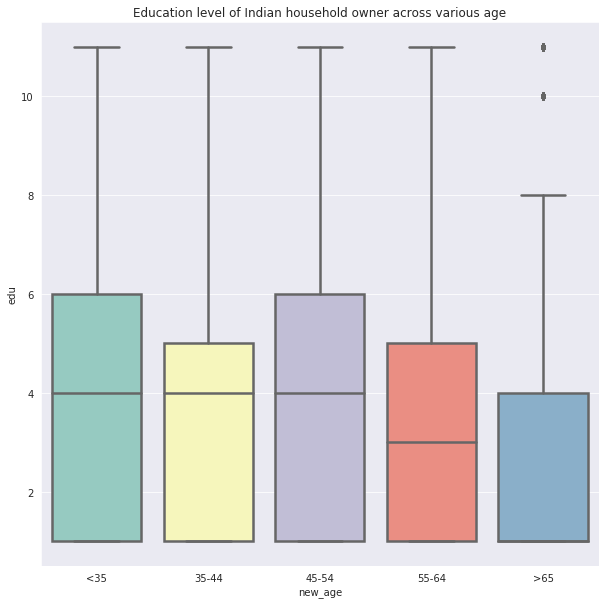

In [0]:
#Visualizing the education level of Indian household owner across various age, to find out if education has any significant income on overall wealth
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="new_age", y="edu",
                 data=df3, palette="Set3",linewidth=2.5)
plt.title('Education level of Indian household owner across various age')

It can be seen in the boxplot that **Education level decreases slowly as the** **household-owner's age increase** bold text bold text. This proves that the elder people were less educated compared to the younger ones.

We need to see if **there is a significant impact of education level in the wealth distribution of the households**. 

In [0]:
#Trying to visualize the wealth distribution for different household size and see how it depends on age of owner
plt.figure(figsize=(12,12))
sns.scatterplot(x="hh_size", y="wealth",hue='new_age' ,data=df3)

Cannot deduce clearly from the above plot education is impacting total wealth of a household.

But we can deduce that as the **size of a houlshold increases, their total wealth** **decreases.** 

In [0]:
#Trying to visualize the the effect of age on wealth of an household
import seaborn as sns
sns.catplot(x="new_age", y="wealth", data=df3)

We can see a faint relation between wealth and age. As age inceases, the wealth of an household also increases.

As wealth has a positive correlation with age whereas education has a negative correlation with age, we can deduce:

Total wealth of an Indian household depends on age of the owner maybe because with more age, they save more wealth but have no dependency on the Education level of owner.

In [0]:
df4=df3.sort_values(by=['wealth'],ascending=False)

In [0]:
df.State.nunique()

35

In [0]:
df.District.nunique()

70

Text(0.5, 1.0, 'Top 5 States with Highest wealth distribution')

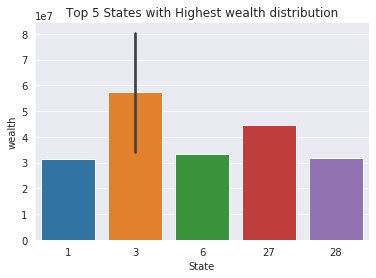

In [0]:
#Showing top 5 States with Highest wealth distribution
g=sns.barplot(x="State", y="wealth", data=df4[:6])
plt.title('Top 5 States with Highest wealth distribution')

States  ***3,27,6,28,1*** have the highest wealth distribution respectively (**top 5**)



Text(0.5, 1.0, 'Top 5 States with Lowest wealth distribution')

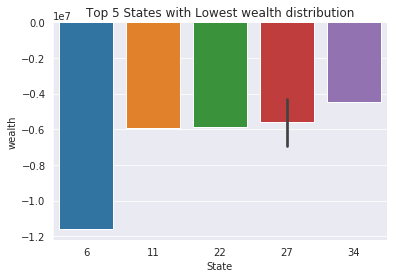

In [0]:
#Showing top 5 States with Lowest wealth distribution
h=sns.barplot(x="State", y="wealth", data=df4[-6:])
plt.title('Top 5 States with Lowest wealth distribution')

States ***6,27,11,22,34*** has the lowest Wealth respective(**bottom 5**).

The barplots grow in negative direction to indicate they have net negative wealth i.e, more liabilities than asset.

In [0]:
#Showing distribution of Wealth Across Various States of India
plt.figure(figsize=(10,45))
sns.relplot(x="State", y="wealth", kind="line", data=df4)
plt.title('Distribution of Wealth Across Various States of India')

Text(0.5, 1, 'Distribution of Wealth Across Various States of India')

<Figure size 720x3240 with 0 Axes>

The point where spikes are low, there the states have low wealth and likewise the points where spikes are high, the states have high wealth.

In [0]:
#Showing distribution of Wealth Across Various Districts of India
sns.relplot(x="District", y="wealth", kind="line", data=df4)
plt.title('Distribution of Wealth Across Various Districts of India')

Text(0.5, 1, 'Distribution of Wealth Across Various Districts of India')

In [0]:
#Dividing the total weatlh of Indian Households into Quintiles and assigning how many HouseHold falls in each wealth Quintile. Here Q -> Quintile
l1=[]
for i in range(-11649810,80454291,(80454290+11649810)//5): #here 80454290 is the highest net wealth and -11649810 is the lowest net wealth
  l1.append(i)
l2=[]
l2.append(df4[(df4.wealth>=l1[0]) & (df4.wealth<l1[1])].shape[0])
l2.append(df4[(df4.wealth>=l1[1]) & (df4.wealth<l1[2])].shape[0])
l2.append(df4[(df4.wealth>=l1[2]) & (df4.wealth<l1[3])].shape[0])
l2.append(df4[(df4.wealth>=l1[3]) & (df4.wealth<l1[4])].shape[0])
l2.append(df4[(df4.wealth>=l1[4]) & (df4.wealth<=l1[5])].shape[0])
data={'value':l2,'label':['1st Q','2nd Q','3rd Q','4th Q','5th Q']}
print('Number of household in each wealth Quintile')
df10=pd.DataFrame(data)
df10

Number of household in each wealth Quintile


value  label
0  143067  1st Q
1     209  2nd Q
2       7  3rd Q
3       1  4th Q
4       1  5th Q

In [0]:
#Plotting the frequency of Household in each Wealth Quintile
plt.figure(figsize=(20,20))
ct=sns.catplot(x="label",y='value',linestyles="--",kind='point', data=df10)
plt.title('Frequency of Household in each Wealth Quintile')

Text(0.5, 1, 'Frequency of Household in each Wealth Quintile')

<Figure size 1440x1440 with 0 Axes>

As seen from the above table and lineplots, **the first Quintile has most of the** **household compared to others**. The last two quintiles each have only 1 househols.

Creating an dataframe with the sum of all features of each category of liabilitiea and assets

In [0]:
FA_1

kind_loans    Age
0       1000.00000    <35
1       1000.00000  45-54
2       1000.00000  35-44
3       1000.00000    >65
4       1000.00000    <35
...            ...    ...
143280  1000.00000  55-64
143281  1000.00000  45-54
143282  1000.00000    >65
143283  1000.00000  45-54
143284  1000.00000    <35

[143285 rows x 2 columns]

In [0]:
REA_1['REA_1_SUM']=REA_1.sum(axis=1)
DG_1['DG_1_SUM']=DG_1.sum(axis=1)
UD_1['UD_1_SUM']=UD_1.sum(axis=1)
SD_1['SD_1_SUM']=SD_1.sum(axis=1)
result=pd.concat([REA_1['REA_1_SUM'],DG_1['DG_1_SUM'],FA_1[:-1],G_1[:-1],UD_1['UD_1_SUM'],SD_1['SD_1_SUM']],axis=1)
result.rename(columns={"bullion": "G1_SUM", "kind_loans": "FA_1_SUM"})
result.fillna(result.median(),inplace=True)
result['wealth']=df3['wealth']

Quintiles from left to right i.e, 1st Q, 2nd Q........,5th Q


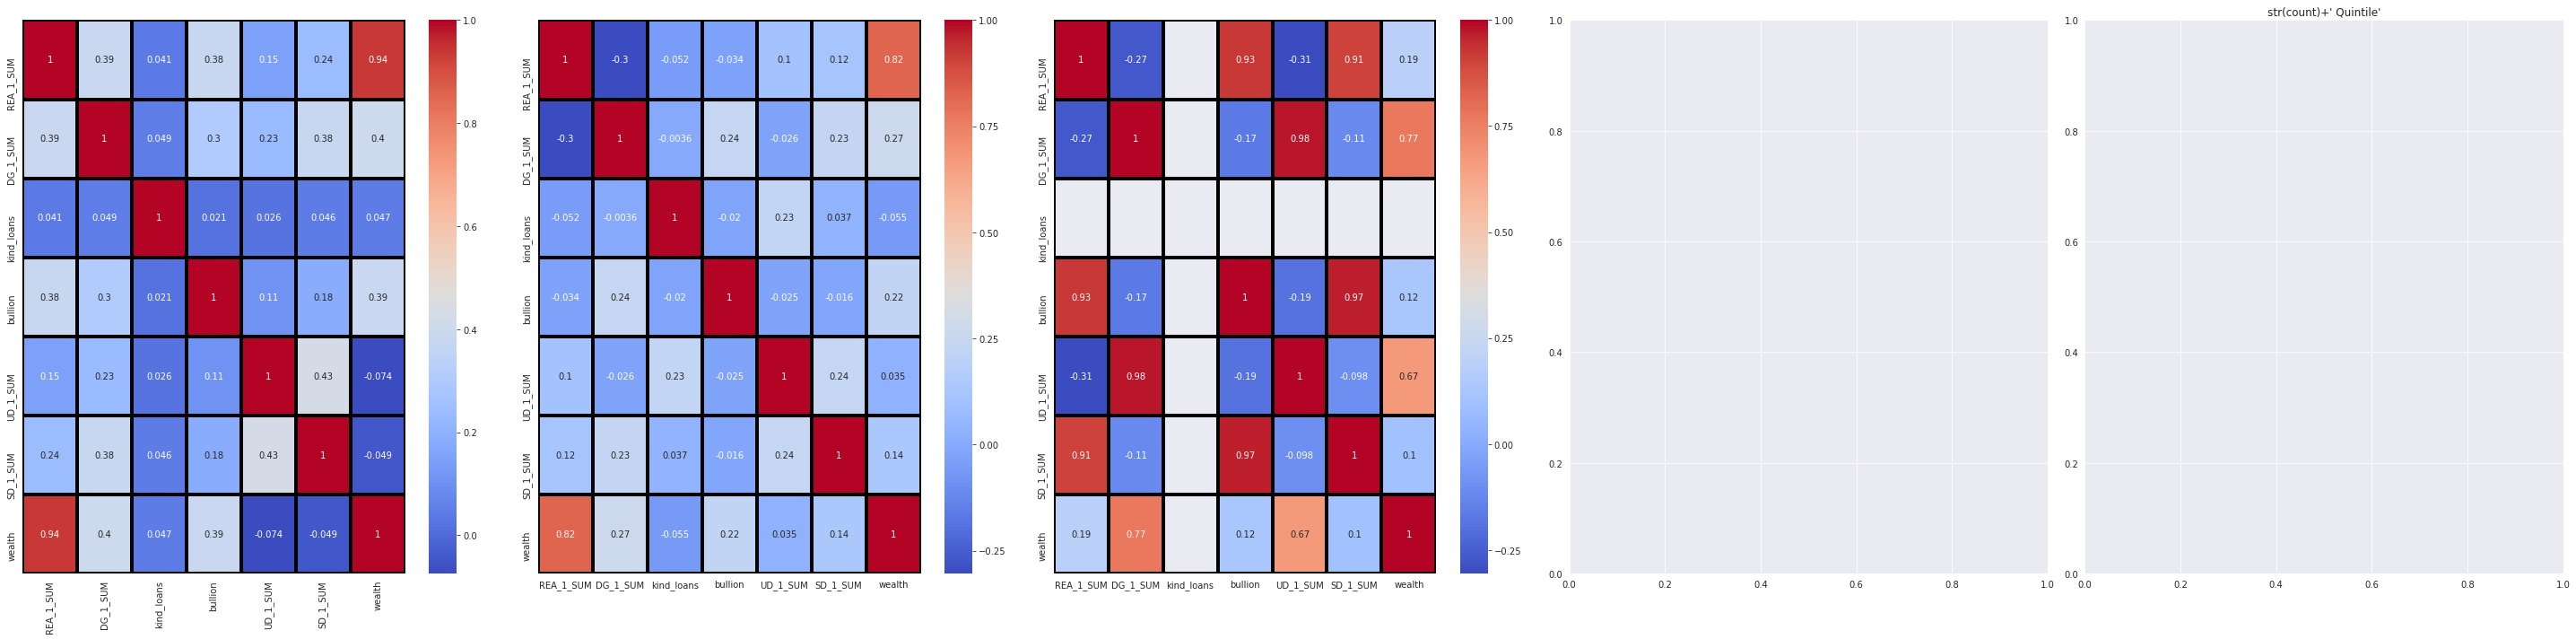

In [0]:
#Seeing which category among all of assets and liabilities has more impact on total income of a household for each Quintile
l3=[result[(result.wealth>=l1[0]) & (result.wealth<l1[1])],result[(result.wealth>=l1[1]) & (result.wealth<l1[2])],result[(result.wealth>=l1[2]) & (result.wealth<l1[3])],result[(result.wealth>=l1[3]) & (result.wealth<l1[4])],result[(result.wealth>=l1[4]) & (result.wealth<=l1[5])]]
fig, axes = plt.subplots(ncols=5, figsize=(40,10))
count=1
try: 
 for ax,col in zip(axes,l3):
  sns.heatmap(col.corr(),cmap= 'coolwarm', linewidths=3, linecolor='black',annot=True,ax=ax)
  plt.title("str(count)+' Quintile'")
  count+=1
  plt.tight_layout() 
  #plt.yscale('log')
except:
 print('Quintiles from left to right i.e, 1st Q, 2nd Q........,5th Q')
 plt.show()
 

The effect of different category on wealth distribution for different Quintiles. It can be seen that for different Quintiles the impact by descending order is **Real Estate Asset> Durable Goods> Livestock> Unsecured Debts> Secured Debts**

Above the last two heatmap is not obtained because last two Quintiles have only 1 value each as seen earlier.



In [0]:
#To see the overall effect, we take the heatmap of all the asset and liabilities category. Note that we took only the net asset here, not the individual categories like liabilities to keep the heatmap small and interpreteble.
plt.figure(figsize=(25,25))
sns.heatmap(df3.corr(),cmap= 'coolwarm', linewidths=3, linecolor='black',annot=True)

In the above heatmap it is further confirmed that net asset has the largest effect on wealth of household and since we have seen earlier, among all assets Real Estate asset has largest value so it has the largest impact on wealth.

In [0]:
#Seeing stats of wealth distribution of Each Category in 4yh Quintile
result1=result[(result.wealth>=l1[4]) & (result.wealth<=l1[5])]
result1

REA_1_SUM     DG_1_SUM  ...     SD_1_SUM         wealth
6174 80394000.00000 291290.00000  ... 262000.00000 80454290.00000

[1 rows x 9 columns]

In [0]:
#Seeing stats of wealth distribution of Each Category in 4yh Quintile
result2=result[(result.wealth>=l1[3]) & (result.wealth<l1[4])]
result2

REA_1_SUM   DG_1_SUM  ...     SD_1_SUM         wealth
18662 44704344.00000 9780.00000  ... 132340.00000 44587784.00000

[1 rows x 9 columns]

Q. **Analyse and
visualise Indian households’ participation in financial markets and balance sheet allocation across
life cycle (age) and wealth distribution**

A: The visualization is done above. The Real Estate Asset the most impact on the household wealth of Indians, followed by livestocks. Among liabilities, Unsecured and secured debt has the most impact on financial market balance sheet. 

With more age, the household acquires more wealth as proved in an early plot.




Q. **Using a multivariate analysis, determine key factors that lead to participation
and
allocation
in formal financial markets, across both assets and liabilities.**

A: A descending order of impact of various factors on participation of household in financial market is given earlier. Participation increase with wealth, but not have signficant positive relationship with education level The reason might be as most participation is in the form of Real Estate Asset, you don't need education to acquire that, Real Estate Asset is mostly inherited. Also as family size increase, the net wealth decreases it might be due to more number for the owner of household to feed and more reponsibility to take care of.